<center><h2>Chicago_Crimes_Data_2010_2017 </h2>
   <h3> Data Analysis and Predictive Modeling <h3></center>

<font size = 4>__Importing required libraries__  </font>

In [271]:
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# ML Libraries
from sklearn.metrics import *  #precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate


# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics


In [272]:
df = pd.read_csv('chicago_crimes_data_2010_2017.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/12 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25.0,36.0,18.0,14,41.923153,-87.802559,2012,train
1,720647,8417624,HT650924,12/28/11 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5.0,34.0,53.0,15,41.679787,-87.627957,2011,train
2,32037,7348669,HS150223,2/3/10 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10.0,28.0,30.0,08B,41.848314,-87.691627,2010,train
3,532182,8124889,HT358665,6/21/11 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22.0,19.0,75.0,3,41.692042,-87.665924,2011,train
4,2420587,11164022,JA530938,11/30/17 11:45,031XX W DIVERSEY AVE,325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,1411,14.0,35.0,21.0,3,41.932040,-87.705287,2017,test


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488270 entries, 0 to 488269
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            488270 non-null  int64  
 1   ID                    488270 non-null  int64  
 2   Case Number           488269 non-null  object 
 3   Date                  488270 non-null  object 
 4   Block                 488270 non-null  object 
 5   IUCR                  488270 non-null  object 
 6   Primary Type          488270 non-null  object 
 7   Description           488270 non-null  object 
 8   Location Description  487680 non-null  object 
 9   Arrest                488270 non-null  bool   
 10  Domestic              488270 non-null  bool   
 11  Beat                  488270 non-null  int64  
 12  District              488269 non-null  float64
 13  Ward                  488261 non-null  float64
 14  Community Area        488183 non-null  float64
 15  

In [274]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
df = df.dropna().reset_index()
df = df.drop(['index'], axis = 1)
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test
0,1027327,8899599,HV573490,11/22/12 11:00,023XX N NORDICA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2512,25.0,36.0,18.0,14,41.923153,-87.802559,2012,train
1,720647,8417624,HT650924,12/28/11 21:17,002XX W 118TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,522,5.0,34.0,53.0,15,41.679787,-87.627957,2011,train
2,32037,7348669,HS150223,2/3/10 21:40,026XX W 24TH ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,1034,10.0,28.0,30.0,08B,41.848314,-87.691627,2010,train
3,532182,8124889,HT358665,6/21/11 13:10,017XX W PRYOR AVE,320,ROBBERY,STRONGARM - NO WEAPON,CTA BUS,False,False,2212,22.0,19.0,75.0,3,41.692042,-87.665924,2011,train
4,2420587,11164022,JA530938,11/30/17 11:45,031XX W DIVERSEY AVE,325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,1411,14.0,35.0,21.0,3,41.932040,-87.705287,2017,test


In [275]:
# As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
df = df.sample(n=200000)

In [276]:
# Remove irrelevant/not meaningfull attributes
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 28316 to 440025
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  200000 non-null  object 
 1   Block                 200000 non-null  object 
 2   IUCR                  200000 non-null  object 
 3   Primary Type          200000 non-null  object 
 4   Description           200000 non-null  object 
 5   Location Description  200000 non-null  object 
 6   Arrest                200000 non-null  bool   
 7   Domestic              200000 non-null  bool   
 8   Beat                  200000 non-null  int64  
 9   District              200000 non-null  float64
 10  Ward                  200000 non-null  float64
 11  Community Area        200000 non-null  float64
 12  FBI Code              200000 non-null  object 
 13  Latitude              200000 non-null  float64
 14  Longitude             200000 non-null  float64
 

In [277]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day

df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Year,train_or_test,Month,Day
28316,001XX E DELAWARE PL,1120,DECEPTIVE PRACTICE,FORGERY,BANK,True,False,1833,18.0,42.0,8.0,10,41.899233,-87.622609,2012,train,7,18
271419,042XX N MELVINA AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,1624,16.0,38.0,15.0,14,41.957691,-87.781827,2013,train,8,2
312795,072XX S EAST END AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,324,3.0,8.0,43.0,26,41.763729,-87.583614,2010,train,9,21
136566,075XX S STONY ISLAND AVE,810,THEFT,OVER $500,STREET,False,False,411,4.0,5.0,43.0,6,41.758432,-87.586128,2011,train,8,4
474409,006XX N KINGSBURY ST,860,THEFT,RETAIL THEFT,CONVENIENCE STORE,True,False,1831,18.0,42.0,8.0,6,41.893363,-87.641365,2013,train,9,14


In [278]:
# Convert Categorical Attributes to Numerical
df1 = df.copy()

df['Block']= pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Domestic'] = pd.factorize(df["Domestic"])[0]



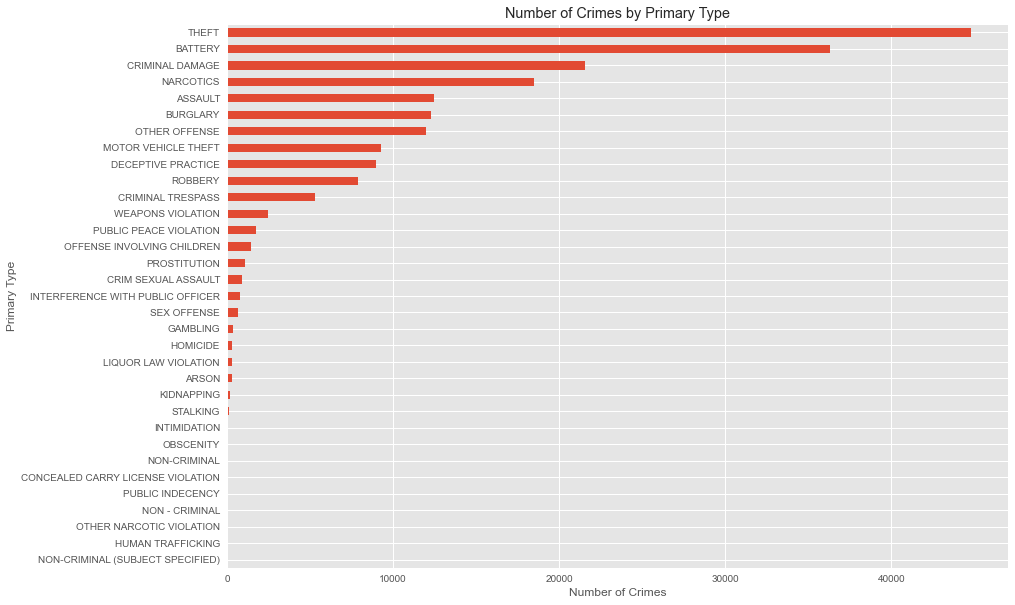

In [279]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.style.use('ggplot')

plt.title('Number of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Number of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [280]:
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
15,LIQUOR LAW VIOLATION,314
0,ARSON,296
14,KIDNAPPING,165
30,STALKING,101
13,INTIMIDATION,76
21,OBSCENITY,25
19,NON-CRIMINAL,11
4,CONCEALED CARRY LICENSE VIOLATION,10
26,PUBLIC INDECENCY,8
18,NON - CRIMINAL,5


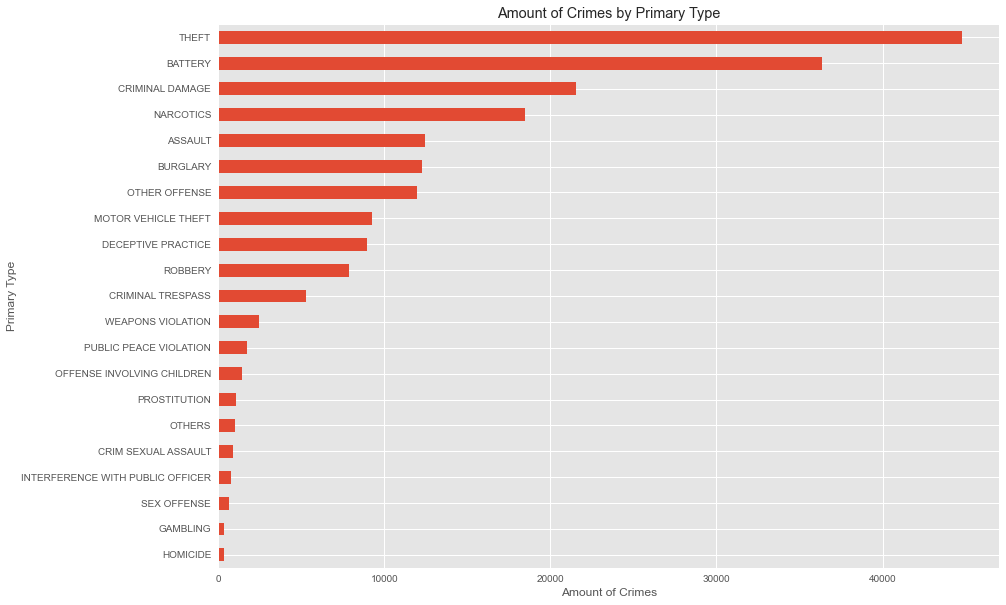

In [281]:
#After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [282]:
# Now we are left with 14 Class as our predictive class
Classes = df['Primary Type'].unique()
Classes

array(['DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'OTHER OFFENSE', 'THEFT',
       'BATTERY', 'WEAPONS VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS',
       'ASSAULT', 'NARCOTICS', 'BURGLARY', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'MOTOR VEHICLE THEFT',
       'CRIM SEXUAL ASSAULT', 'GAMBLING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'OFFENSE INVOLVING CHILDREN',
       'PROSTITUTION', 'OTHERS', 'HOMICIDE'], dtype=object)

In [283]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

<AxesSubplot:ylabel='% of Arrests'>

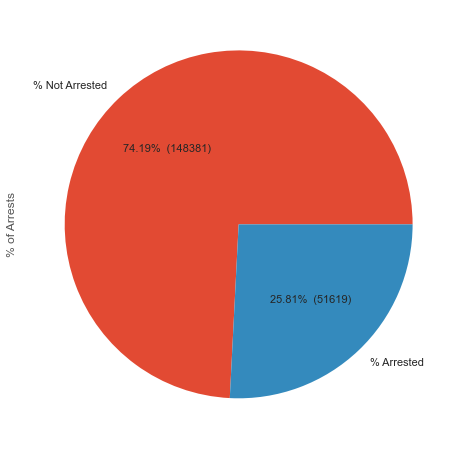

In [284]:
## Convert values into percentages
arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8))

In [285]:
chicago_map = folium.Map(location=[41.864073, -87.706819],
                        zoom_start=13,
                        tiles='CartoDB dark_matter')

In [297]:
df1 = df1.reset_index()
for i in range(len(df1[:300])):
    lat = df1['Latitude'][i]
    long = df1['Longitude'][i]
    
    popup_text = """ Community Index: {}<br>
    Block: {}<br>
    Crime Description: {}<br>"""
    popup_text = popup_text.format(i, df1['Block'][i], df1['Primary Type'][i])
    folium.CircleMarker(location = [lat, long], popup = popup_text, fill = True).add_to(chicago_map)
chicago_map

### Correlation of features

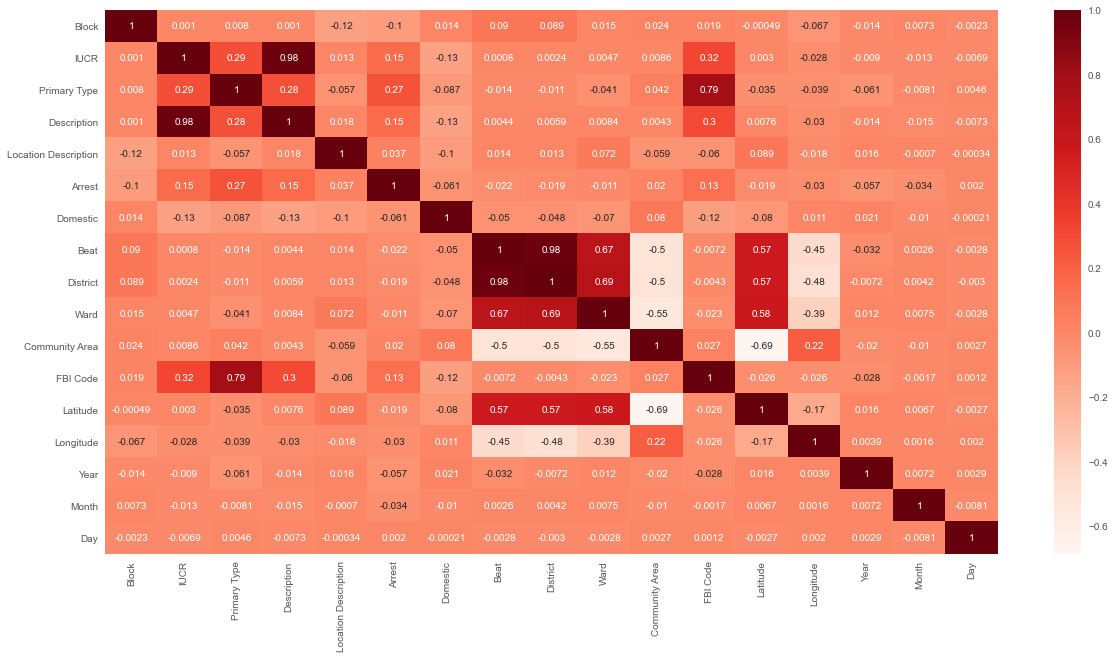

In [288]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<font size = 3>Further Elaboration of Correlation:</font>

The correlation coefficient has values between -1 to 1.

    A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    A value closer to 1 implies stronger positive correlation 
    A value closer to -1 implies stronger negative correlation  

In [289]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.285067
Primary Type    1.000000
Description     0.279135
Arrest          0.267899
FBI Code        0.790086
Name: Primary Type, dtype: float64

In [290]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["Domestic", "Description", "FBI Code"]
print('Selected Features: ', Features)

Selected Features:  ['Domestic', 'Description', 'FBI Code']


In [291]:
#Splittig the dataset on basis of train/test.
df1_train = df[df["train_or_test"] == 'train']    
df1_test = df[df["train_or_test"] == 'test']

<font size = 5> __Multiclass classification__ </font>

In [292]:
x1 = df1_train[["Domestic", "Description", "FBI Code"]]    #Features to train
x2 =  df1_train[["Primary Type"]]    #Target Class to train

In [293]:
y1 = df1_test[["Domestic", "Description", "FBI Code"]]    #Features to test
y2 = df1_test[["Primary Type"]]    #Target Class to test

<font size = 4> __Machine Learning Modelling__ <font size>



In [294]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y1)

c:\users\fahad\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [295]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.9961922893860067
Recall      :  0.9961922893860067
Precision   :  0.9960686877256284
F1 Score    :  0.9961922893860067
Confusion Matrix: 
[[ 2336     1     0     0     0     0     0     0     2     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0  4861     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0  2619     0     0     0     0     0     0     0     0     0
      1     0     0     0     0     3     0     0     0]
 [    0     0     0 10145     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    7     0     0     0  8005     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   643     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    0     0  

c:\users\fahad\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


================= Classification Report =================

                                  precision    recall  f1-score   support

              DECEPTIVE PRACTICE       1.00      1.00      1.00      2339
                 CRIMINAL DAMAGE       1.00      1.00      1.00      4861
                   OTHER OFFENSE       0.98      1.00      0.99      2623
                           THEFT       1.00      1.00      1.00     10145
                         BATTERY       1.00      1.00      1.00      8012
               WEAPONS VIOLATION       0.99      1.00      0.99       644
                         ROBBERY       1.00      1.00      1.00      1861
               CRIMINAL TRESPASS       1.00      1.00      1.00      1120
                         ASSAULT       0.99      1.00      1.00      3162
                       NARCOTICS       1.00      1.00      1.00      1693
                        BURGLARY       1.00      1.00      1.00      2213
                     SEX OFFENSE       0.89      0.9

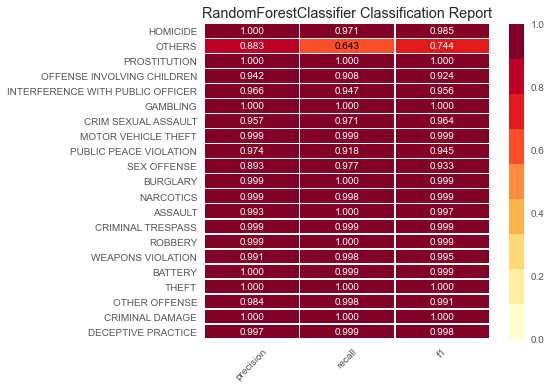

In [296]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()  

 <center> 
    <font size = 4><h2> THE END </h2>
    </font> </center>